<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Assignment-2/multihead_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing library for module autoreload

In [0]:
#To plot the graph in the output cell and save it with notebook
%matplotlib inline

#To reload all modules before executing a new line
%reload_ext autoreload
%autoreload 2

## Importing libraries

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt

2.2.0-rc4


## Mounting Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Path for the data

In [0]:
root_dir = "/content/drive/My Drive/multiclass-data/"

## Importing tf's ImageDatagenerator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Applied Image augmentation on the raw data using parameters - shear_range, zoom_range and horizontal_flip

In [0]:
train_datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

## We have data separated in folders according to the class labels. So, we are using datagenerator's flow_fron_directory() function

In [0]:
train_generator = train_datagen.flow_from_directory(directory=root_dir+"train/", target_size=(100, 100), color_mode="rgb", batch_size=32, class_mode="sparse", shuffle=True, seed=42)

Found 2400 images belonging to 8 classes.


## While loading the validation data, which is different from train data we should not do shuffle

In [0]:
valid_generator = train_datagen.flow_from_directory(directory=root_dir+"valid/", target_size=(100,100), color_mode="rgb", batch_size=32, class_mode='sparse', shuffle=False, seed=42)

Found 960 images belonging to 8 classes.


In [0]:
print(valid_generator.n//valid_generator.batch_size)

30


## Getting the class labels from the loaded data

In [0]:
classes = list(train_generator.class_indices.keys())
print(classes)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


## Getting the iterator object from the datagenerator class

In [0]:
iterator = train_generator.__iter__()

In [0]:
x,y = iterator.next()

## A sample input shape. We can see that all images are now uniformly trimmed to size of (100,100)

In [0]:
x.shape

(32, 100, 100, 3)

## Visualizing the loaded dataset

motorbike


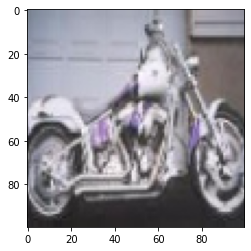

motorbike


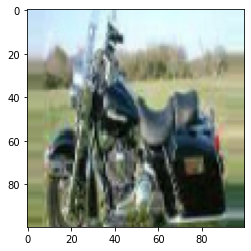

cat


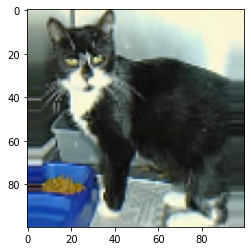

fruit


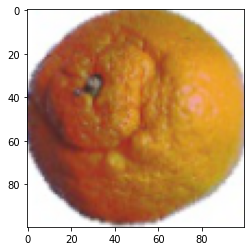

motorbike


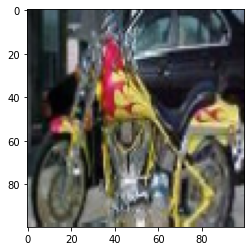

airplane


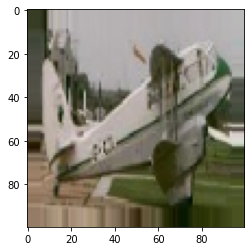

flower


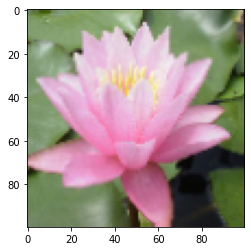

fruit


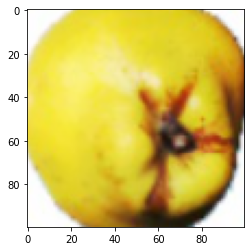

flower


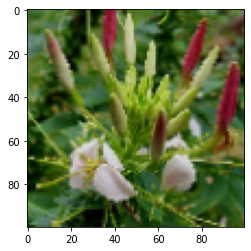

dog


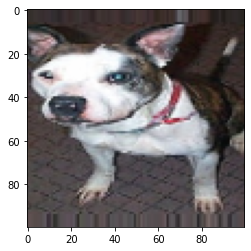

In [0]:
import numpy as np
for i in range(0,10):
    image = x[i]
    #print(image.shape)
    print(classes[int(y[i])])
    plt.imshow(image/255.)
    plt.show()

## Model definition for classification task:


1.  Sequential layer followed by 2D convoluation layer having kernel size of (3,3) and having a Relu activation layer before feeding to the next layer
2. Added Batch Normalization
3. MaxPooling layer added of size 2
4. 2% dropout layer added
5. Then comes the flatten layer of size 256 with Relu activation
6. Then we have 8 node softmax activation layer.



In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=300, kernel_size=(3,3), kernel_initializer=tf.keras.initializers.he_normal(), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=300, kernel_size=(3,3), kernel_initializer=tf.keras.initializers.he_normal(), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 300)     8400      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 300)     1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 300)       0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 300)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 300)       810300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 300)       1200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 300)       0

##Compile the model with below hyper parameters -



1.   loss - sparse_categorical_crossentropy
2.   optimizer - Adam
3.   metrics - accuracy 


In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

## Training the model using the regular K fold cross validation. Trained for a total of 9 epochs

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=9
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/9
75/75 [==============================] - 859s 11s/step - loss: 24.2813 - accuracy: 0.6442 - val_loss: 26.1501 - val_accuracy: 0.4833
Epoch 2/9
75/75 [==============================] - 877s 12s/step - loss: 1.8434 - accuracy: 0.7317 - val_loss: 1.4468 - val_accuracy: 0.6906
Epoch 3/9
75/75 [==============================] - 856s 11s/step - loss: 0.6684 - accuracy: 0.7950 - val_loss: 0.8160 - val_accuracy: 0.7875
Epoch 4/9
75/75 [==============================] - 866s 12s/step - loss: 0.6678 - accuracy: 0.8092 - val_loss: 0.7089 - val_accuracy: 0.7844
Epoch 5/9
75/75 [==============================] - 854s 11s/step - loss: 0.4584 - accuracy: 0.8413 - val_loss: 0.7555 - val_accuracy: 0.8000
Epoch 6/9
75/75 [==============================] - 860s 11s/step - loss: 0.4374 - accuracy: 0.8442 - val_loss: 0.6632 - val_accuracy: 0.8198
Epoch 7/9
75/75 [==============================] - 858s 11s/step - loss: 0.3

## Save the mode usign tf's save_model() which will be saved in protocol buffer format. This model can then be directly loaded used for doing classification on related dataset in real time.

In [0]:
tf.keras.models.save_model(
    model, '/content/drive/My Drive/multiclass-data/', overwrite=True, include_optimizer=True, save_format='tf',
    signatures=None, options=None
)

INFO:tensorflow:Assets written to: /content/drive/My Drive/multiclass-data/assets


## Evaluate again the model using the same validation step. We can use a separate test data also for this.

In [0]:
score = model.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)

In [0]:
print(score)

[0.7101963758468628, 0.8333333134651184]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

## Model result using confusion matrix 

In [0]:
y_pred = model.predict_generator(valid_generator, steps=(valid_generator.n//valid_generator.batch_size)+1)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print('Confusion Matrix')
#confusion_matrix()
if (valid_generator.image_shape == y_pred.shape):
  print(confusion_matrix(valid_generator.classes, y_pred))
  print('Classification Report')
  print(classification_report(valid_generator.classes, y_pred, target_names=classes))

[4 4 4 4 4 4 5 4 4 4 3 4 4 4 3 0 4 4 6 4 4 4 5 4 4 4 4 2 4 4 2 5 4 4 4 4 4
 4 4 4 4 5 4 4 4 4 4 4 3 6 4 4 4 5 6 4 3 4 4 4 4 4 4 4 4 4 5 1 3 4 4 4 5 4
 4 4 4 6 4 6 4 4 4 4 4 4 4 4 5 4 4 3 4 4 4 4 4 3 4 4 4 4 4 6 4 4 4 4 4 4 5
 5 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 3 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 5 7 7 7 3 7 7 7 7 7 7 7 2 7 7 7 7 7 4 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 7 7 7 0
 0 0 0 0 0 0 0 0 0 0 0 0 